In [1]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
import os
from matplotlib.pyplot import figure
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from tqdm.notebook import tqdm

In [2]:
#------------------------------------
# Plots
#------------------------------------
#Adjust figure sizes
rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
# X_axis=np.arange(0,25)
# X_axis1 = X_axis

## Validation Accuracy of Models

In [3]:
accuracy = [91.19, 88.85, 93.04, 87.28, 90.85, 65.00]
model = ['MobileNetV2', 'Resnet50V2', 'InceptResNetV2', 'VGG19', 'InceptionV3', 'EfficientNetV2S']

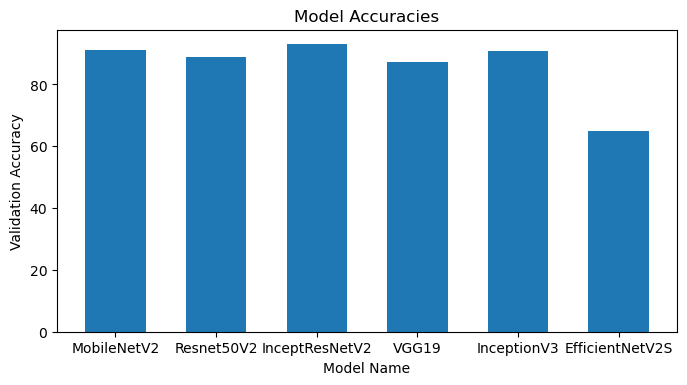

In [8]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
plt.bar(model, accuracy, 0.6)
#     plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Validation Accuracy')
plt.title('Model Accuracies')
# plt.legend()
plt.show()

## Test Accuracy of Models

In [5]:
test_acc = [92.66, 85.71, 92.47, 86.19, 90.85, 65.00]
model = ['MobileNetV2', 'Resnet50V2', 'InceptResNetV2', 'VGG19', 'InceptionV3', 'EfficientNetV2S']

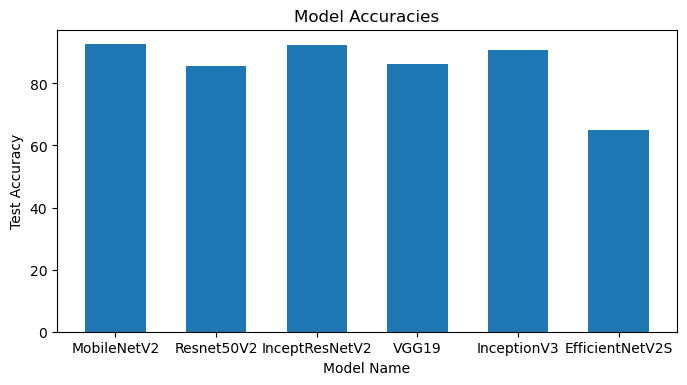

In [9]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
plt.bar(model, test_acc, 0.6)
#     plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracies')
# plt.legend()
plt.show()

## Inference time comparision Before Pruning

In [5]:
#------------------------------------
# Plots
#------------------------------------
#Adjust figure sizes
rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
# X_axis=np.arange(0,25)
# X_axis1 = X_axis

In [16]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
# GPU = [0.0046, 0.0258, 0.02855, 0.0165, 0.0214]
# NCS2 = [0.0298, 0.0768, 0.1390, 0.0445, 0.0515]
# CPU = [0.0185, 0.0539, 0.0686, 0.0348, 0.0417]
# NCS2_Rasp = [0.0508, 0.0851, 0.146, 0.2276, 0.0679]

# model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3']

## FP32 Precision

In [35]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
GPU       = [0.0201, 0.0456, 0.0716, 0.1229, 0.0374, 0.0225]
CPU       = [0.0224, 0.0524, 0.0721, 0.1309, 0.0476, 0.0349]
NCS2      = [0.0418, 0.0685, 0.1244, 0.1830, 0.0556, 0.1435]
NCS2_Rasp = [0.0545, 0.0855, 0.1616, 0.2318, 0.0761, 0.1949]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

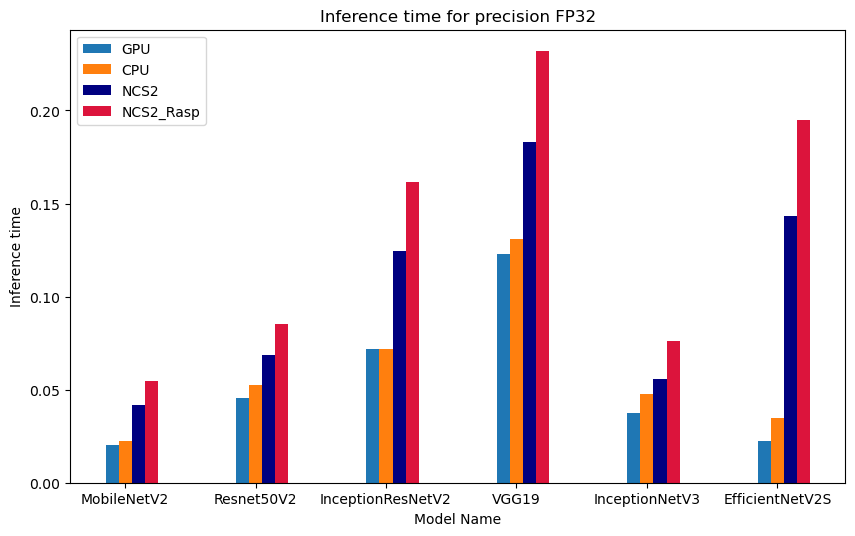

In [120]:
#Adjust figure sizes
rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
width = 0.1
X_axis=np.arange(0,6)
X_axis1 = X_axis
X_axis2 = X_axis + width
X_axis3 = X_axis + width*2
X_axis4 = X_axis + width*3


# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.bar(X_axis1, GPU, 0.1, label='GPU')
plt.bar(X_axis2, CPU, 0.1, label='CPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')


# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Inference time')
plt.title('Inference time for precision FP32')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()

## FP16 Precision

In [13]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
GPU       = [0.0193, 0.0311, 0.0549, 0.0516, 0.0307, 0.0211]
CPU       = [0.0212, 0.0451, 0.0591, 0.1267, 0.0384, 0.0324]
NCS2      = [0.0372, 0.0668, 0.1227, 0.1828, 0.0539, 0.1429]
NCS2_Rasp = [0.0522, 0.0835, 0.1448, 0.2314, 0.0723, 0.1898]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV3', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

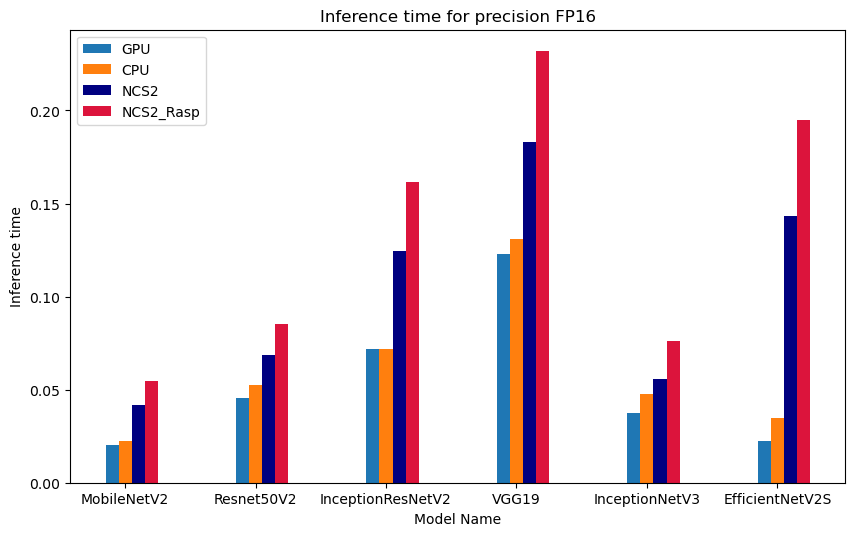

In [121]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.bar(X_axis1, GPU, 0.1, label='GPU')
plt.bar(X_axis2, CPU, 0.1, label='CPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')

# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Inference time')
plt.title('Inference time for precision FP16')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()

# Backup

## Inference time comparision After Pruning

In [9]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
GPU = [0.0074, 0.0225, 0.0250]
NCS2 = [0.0328, 0.0658, 0.1120]
CPU = [0.0091, 0.0615, 0.0600]
NCS2_Rasp = [0.0556, 0.083, 0.147]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2']

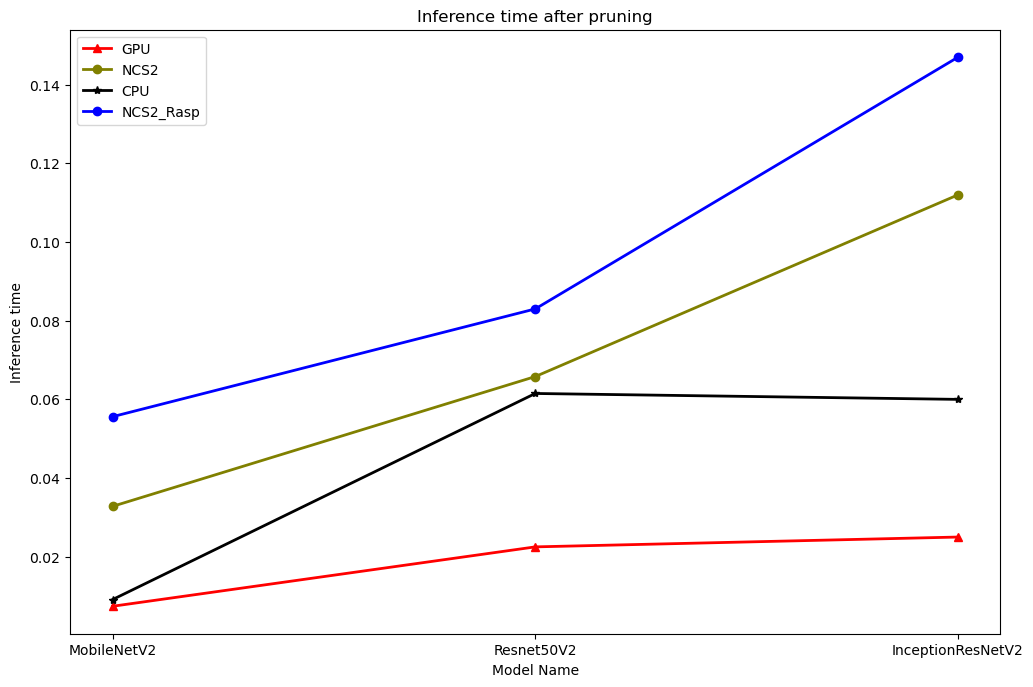

In [10]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.plot(model, GPU, color='red', marker='^', linewidth=2, label='GPU')
plt.plot(model, NCS2, color='olive', marker='o', linewidth=2, label='NCS2')
plt.plot(model, CPU, color='black', marker='*', linewidth=2, label='CPU')
plt.plot(model, NCS2_Rasp, color='blue', marker='o', linewidth=2, label='NCS2_Rasp')

# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Inference time')
plt.title('Inference time after pruning')
plt.legend()
plt.show()